# ANALYSIS ON GLOBAL TERRORISM DATABASE


### INTRODUCTION

Refer to **INTRODUCTION** File in the same folder.

### Exploring data, visualizations and Analysis


**Step 1**: Importing necessary libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

UsageError: Line magic function `%` not found.


**Step 2**: Importing dataset

In [44]:
file_path = 'globalterrorismdb_0718dist.csv'

In [45]:
df=pd.read_csv(file_path,encoding = "ISO-8859-1")

C:\Users\chira\AppData\Local\Temp\ipykernel_10724\3833246122.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file_path,encoding = "ISO-8859-1")


In [46]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


**Step 3**: Getting understanding of dataset

In [47]:
#Count total number of rows and columns
df.shape

(181691, 135)

In [48]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [49]:
# Deleting columns where null values >= 50 %
#Calculate the percentage of null values in each column
null_percentage = (df.isnull().sum() / len(df)) * 100

# Identify columns with null percentage greater than 50
columns_to_drop = null_percentage[null_percentage > 40].index

# Drop columns with null percentage greater than 50
df.drop(columns=columns_to_drop, inplace=True)

# Display the updated DataFrame
df.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,NaN,0,0.0,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,NaN,0,1.0,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1


In [50]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'weapdetail', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'ishostkid', 'scite1', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [51]:
columns_required = ['eventid', 'iyear', 'imonth', 'iday','country_txt','region_txt','city','multiple', 
                    'success', 'suicide', 'attacktype1_txt', 'targtype1_txt',  'targsubtype1_txt', 
                    'corp1', 'target1', 'natlty1_txt', 'weaptype1_txt','nkill','nwoundus', 'claimed', 
                    'individual', 'INT_LOG', 'doubtterr', 'INT_MISC', 'specificity','gname', 'ishostkid', 
                    'INT_ANY', 'guncertain1', 'provstate']

In [52]:
#keeping only necessary columns

In [53]:
df = df[columns_required]

In [54]:
df.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,city,multiple,success,suicide,...,individual,INT_LOG,doubtterr,INT_MISC,specificity,gname,ishostkid,INT_ANY,guncertain1,provstate
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,0.0,1,0,...,0,0,0.0,0,1.0,MANO-D,0.0,0,0.0,NaN
1,197000000002,1970,0,0,Mexico,North America,Mexico city,0.0,1,0,...,0,0,0.0,1,1.0,23rd of September Communist League,1.0,1,0.0,Federal
2,197001000001,1970,1,0,Philippines,Southeast Asia,Unknown,0.0,1,0,...,0,-9,0.0,1,4.0,Unknown,0.0,1,0.0,Tarlac
3,197001000002,1970,1,0,Greece,Western Europe,Athens,0.0,1,0,...,0,-9,0.0,1,1.0,Unknown,0.0,1,0.0,Attica
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,0.0,1,0,...,0,-9,-9.0,1,1.0,Unknown,0.0,1,0.0,Fukouka


In [55]:
df.shape

(181691, 30)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   country_txt       181691 non-null  object 
 5   region_txt        181691 non-null  object 
 6   city              181257 non-null  object 
 7   multiple          181690 non-null  float64
 8   success           181691 non-null  int64  
 9   suicide           181691 non-null  int64  
 10  attacktype1_txt   181691 non-null  object 
 11  targtype1_txt     181691 non-null  object 
 12  targsubtype1_txt  171318 non-null  object 
 13  corp1             139141 non-null  object 
 14  target1           181055 non-null  object 
 15  natlty1_txt       180132 non-null  object 
 16  weaptype1_txt     18

**Step 3:** Data visualizations

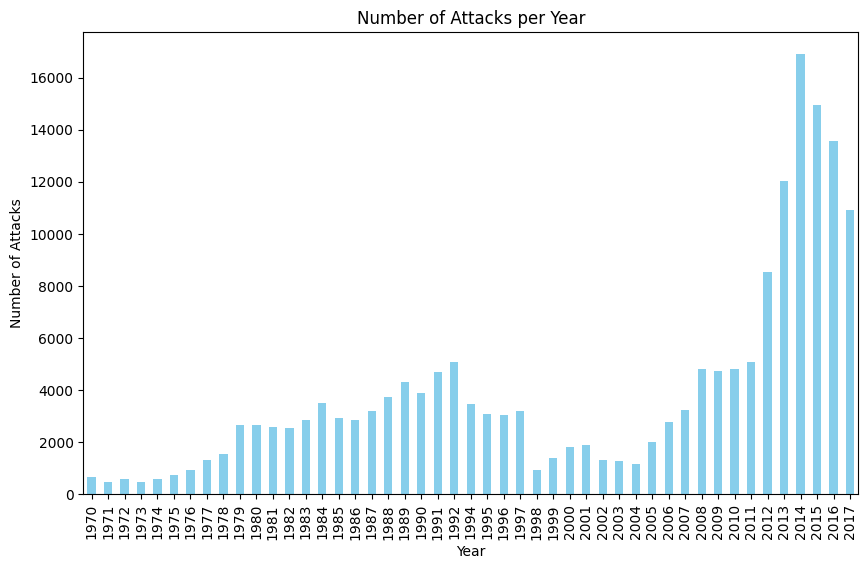

In [57]:
#Creating bar chart showing number of attacks per year
attacks_per_year = df['iyear'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
attacks_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Attacks per Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()


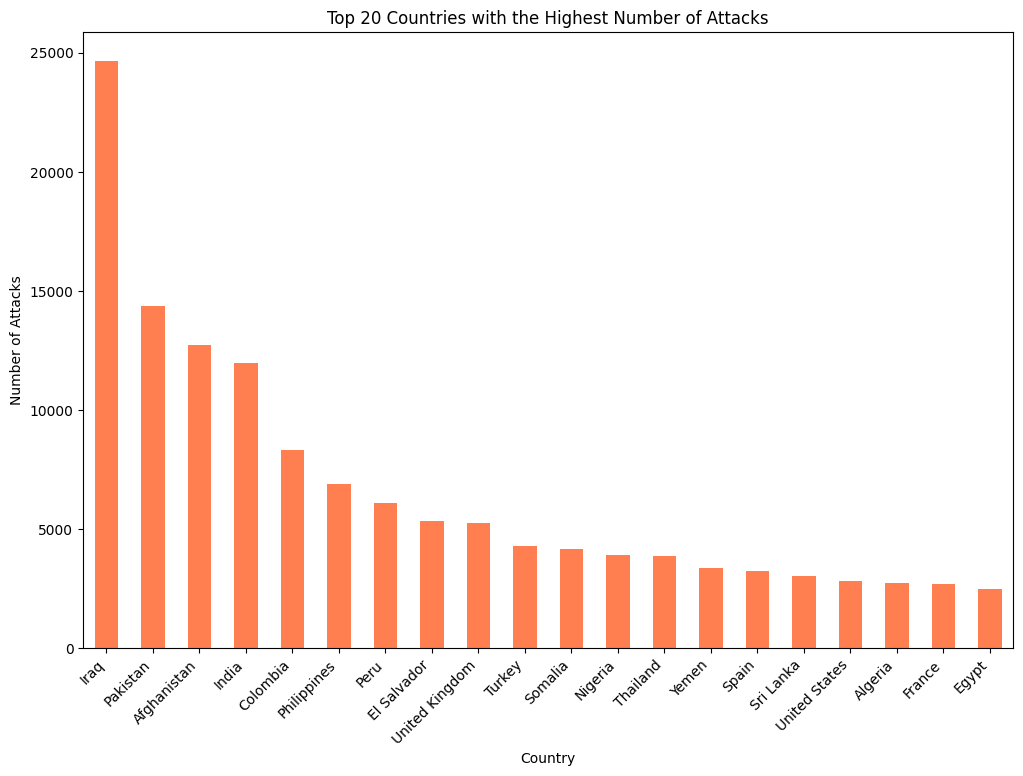

In [58]:
#Showing top 20 countries with most number of attacks
top_countries = df['country_txt'].value_counts().head(20)
top_countries = top_countries.sort_values(ascending=False)
plt.figure(figsize=(12, 8))
top_countries.plot(kind='bar', color='coral')
plt.title('Top 20 Countries with the Highest Number of Attacks')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right')
plt.show()

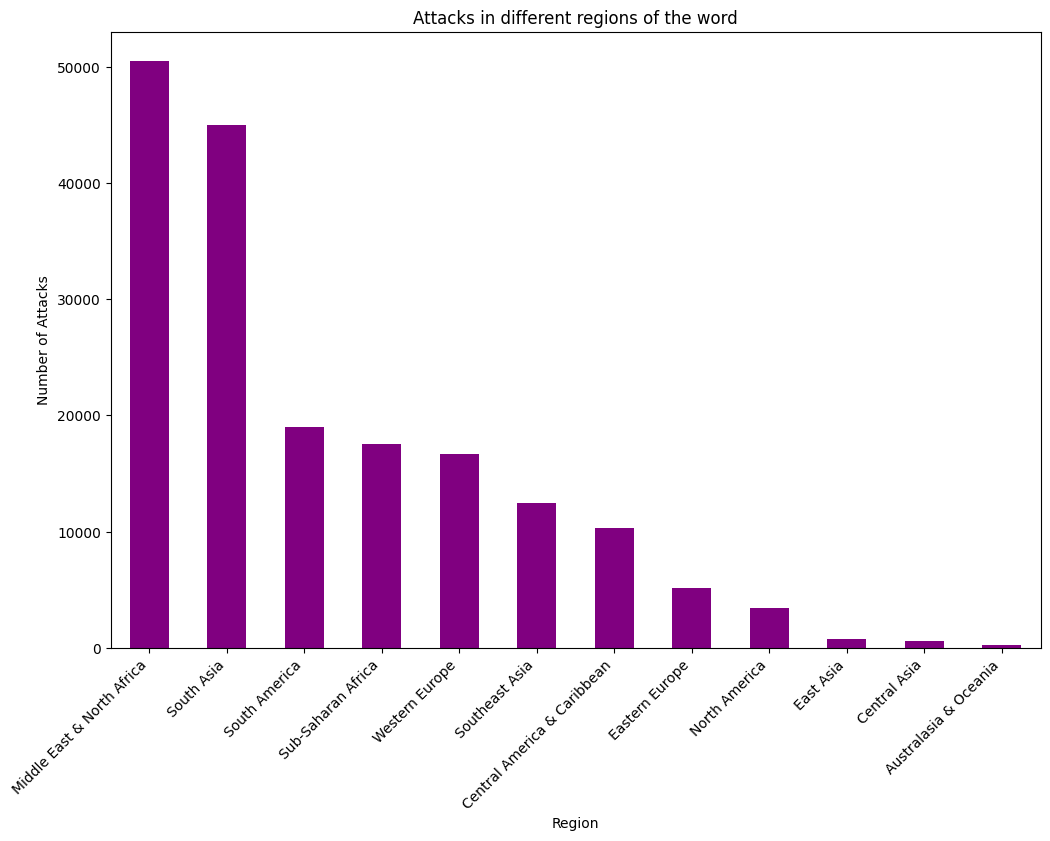

In [59]:
#Showing regions with most number of attacks
regions1 = df['region_txt'].value_counts()
regions1 = regions1.sort_values(ascending=False)
plt.figure(figsize=(12, 8))
regions1.plot(kind='bar', color='purple')
plt.title('Attacks in different regions of the word')
plt.xlabel('Region')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right')
plt.show()

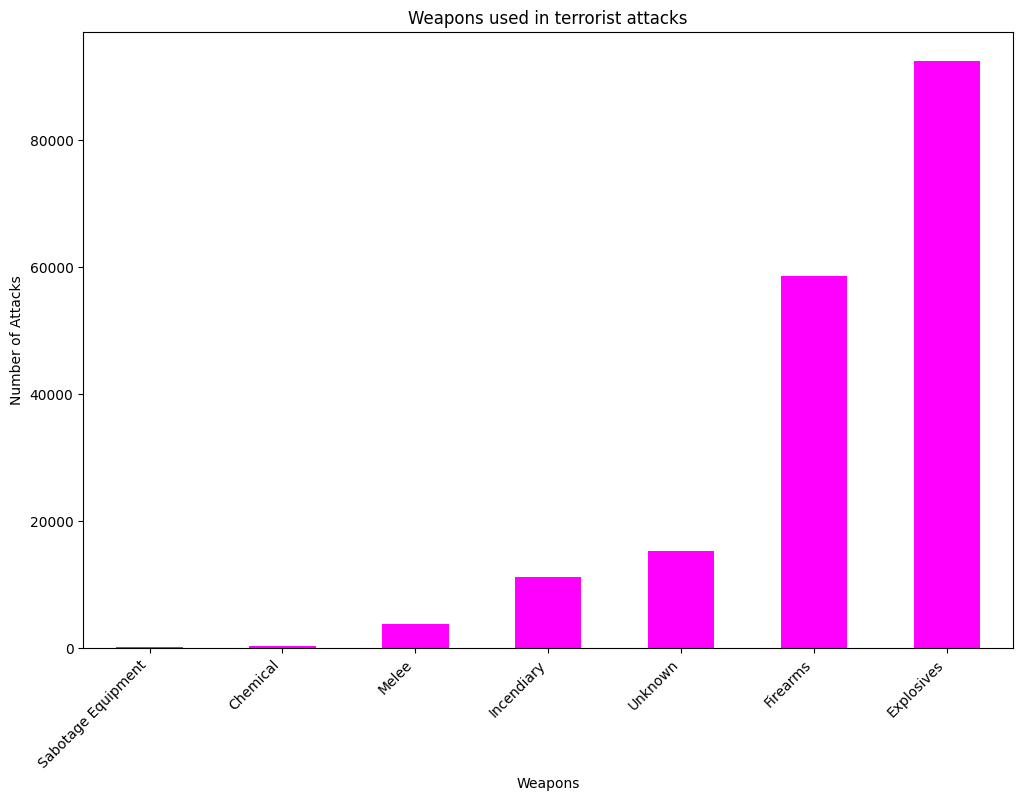

In [60]:
#Showing weapon attacks
weapons1 = df['weaptype1_txt'].value_counts().head(7)
weapons1 = weapons1.sort_values(ascending=True)
plt.figure(figsize=(12, 8))
weapons1.plot(kind='bar', color='magenta')
plt.title('Weapons used in terrorist attacks')
plt.xlabel('Weapons')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right')
plt.show() 

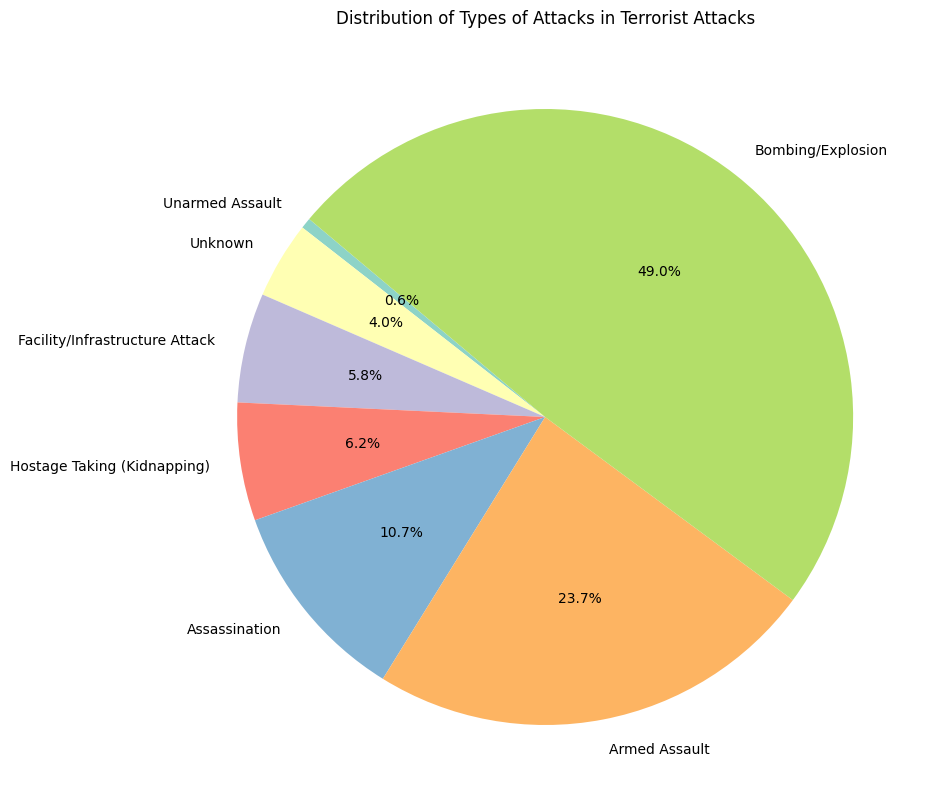

In [61]:
#Showing type of attacks
attack_type = df['attacktype1_txt'].value_counts().head(7)
attack_type = attack_type.sort_values(ascending=True)
plt.figure(figsize=(10, 10))
colors = plt.cm.Set3.colors
plt.pie(attack_type, labels=attack_type.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Types of Attacks in Terrorist Attacks')
plt.show()


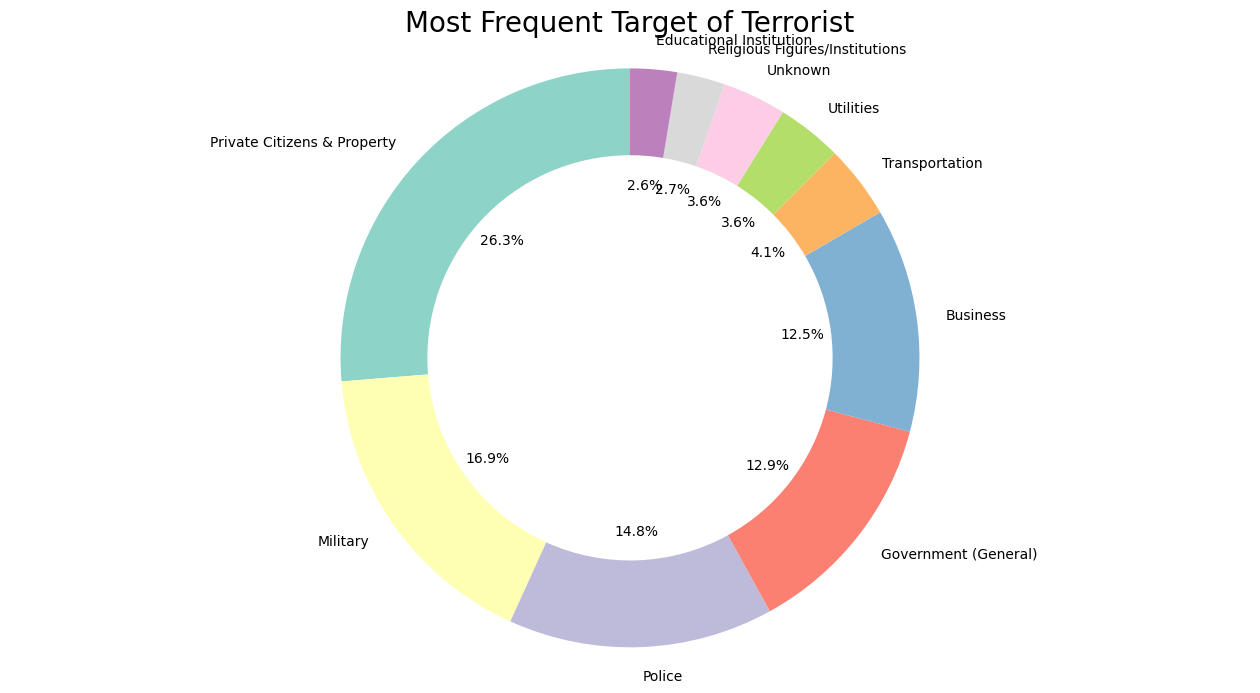

In [62]:


fig, ax = plt.subplots()

sizes = df['targtype1_txt'].value_counts().head(10).values
labels = df['targtype1_txt'].value_counts().head(10).index

colors = plt.cm.Set3.colors  # Choose a colormap

ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.3))

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Most Frequent Target of Terrorist', fontsize=20)
plt.show()

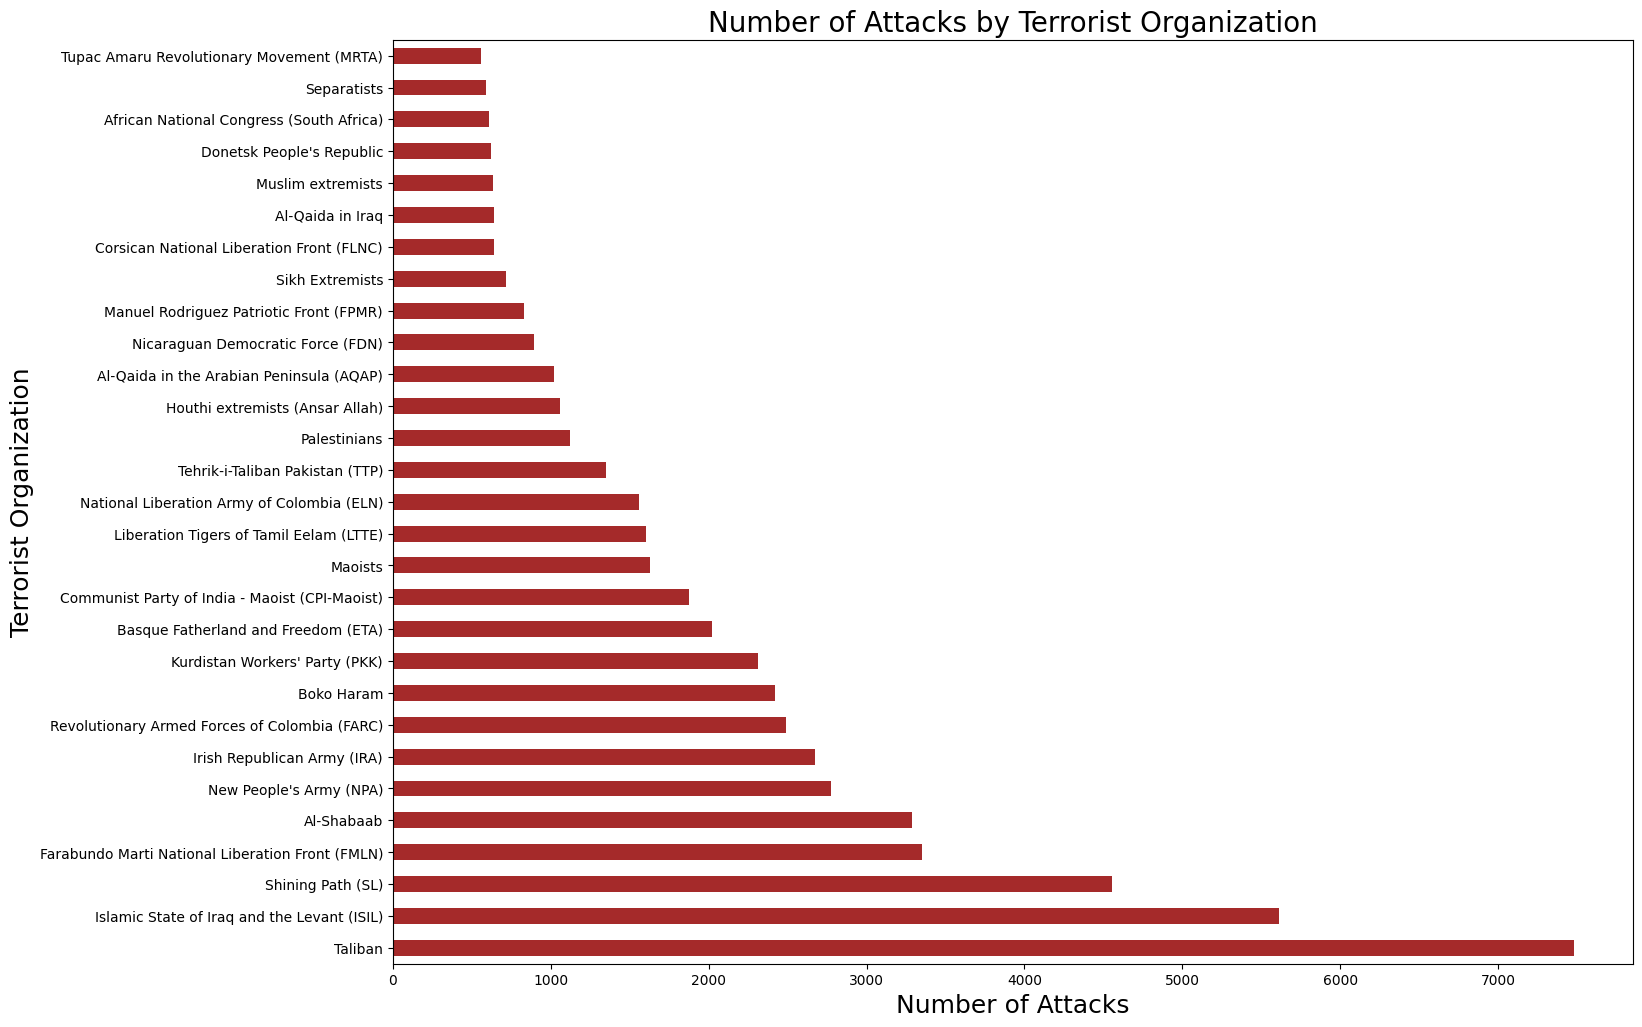

In [74]:
plt.rcParams['figure.figsize'] = 16, 12
ax = df['gname'].value_counts().iloc[1:30].plot(kind='barh', color='brown')
ax.set_xlabel('Number of Attacks', fontsize=18)
ax.set_ylabel('Terrorist Organization', fontsize=18)
ax.set_title('Number of Attacks by Terrorist Organization', fontsize=20)
plt.show()

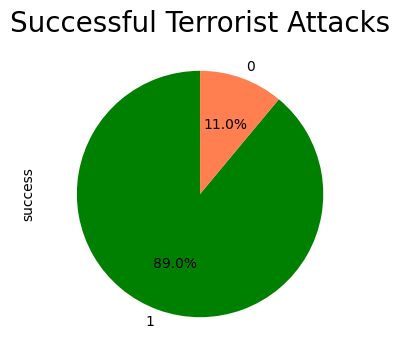

In [79]:
df['success'].value_counts().plot(kind='pie', colors=['green', 'coral'], autopct='%1.1f%%', startangle=90, figsize=(4, 4))
plt.title('Successful Terrorist Attacks', fontsize=20)
plt.show()

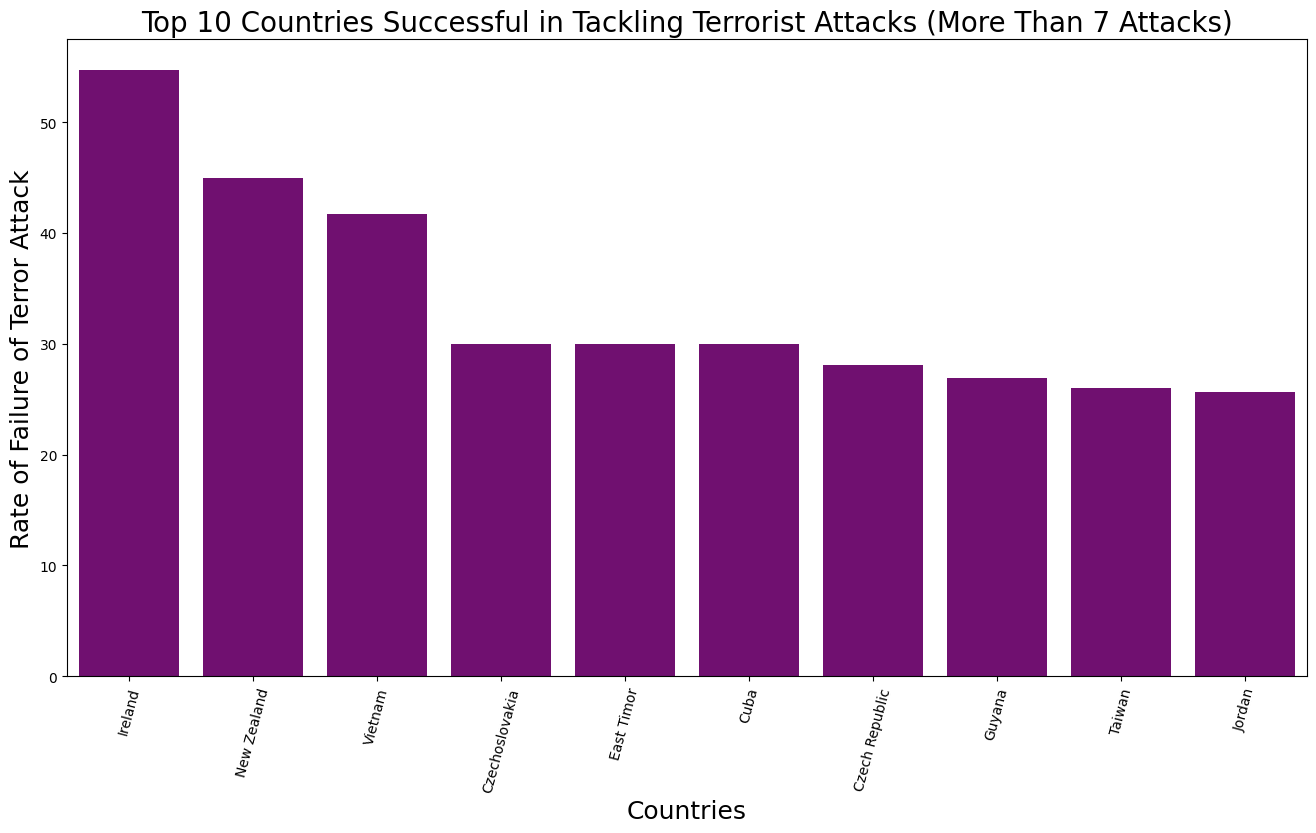

In [86]:
#Now let us compare how different countries tackle with different terrorist attacks
success_country = df.groupby('country_txt').agg( Total_Attacks=('eventid', 'count'),Attack_Success=('success', 'sum')).reset_index()
success_country['Attack_Failed'] = success_country['Total_Attacks'] - success_country['Attack_Success']
success_country['Failure_Rate_Attack'] = (success_country['Attack_Failed'] / success_country['Total_Attacks']) * 100
success_country['Success_Rate_Attack'] = 100 - success_country['Failure_Rate_Attack']
top_countries = success_country[success_country['Total_Attacks'] >= 7].sort_values('Failure_Rate_Attack', ascending=False)[:10]
plt.figure(figsize=(16, 8.27))
ax = sns.barplot(x='country_txt', y='Failure_Rate_Attack', data=top_countries, color = 'purple')
ax.set_xlabel('Countries', fontsize=18)
plt.xticks(rotation=75)
ax.set_ylabel('Rate of Failure of Terror Attack', fontsize=18)
ax.set_title('Top 10 Countries Successful in Tackling Terrorist Attacks (More Than 7 Attacks)', fontsize=20)

plt.show()


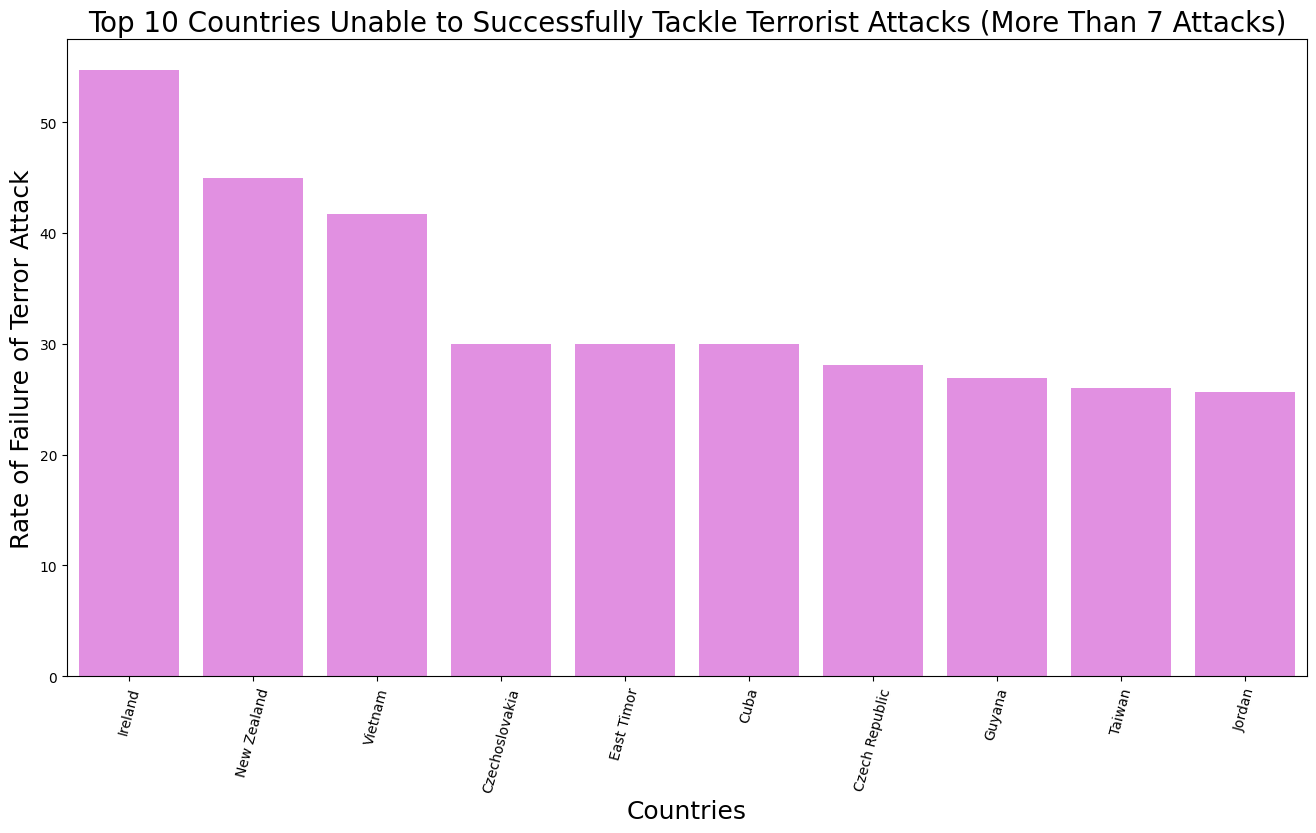

In [92]:
country_summary = df.groupby('country_txt').agg(
    Total_Attacks=('eventid', 'count'),
    Attack_Success=('success', 'sum')
).reset_index()
country_summary['Attack_Failed'] = country_summary['Total_Attacks'] - country_summary['Attack_Success']
country_summary['Failure_Rate_Attack'] = (country_summary['Attack_Failed'] / country_summary['Total_Attacks']) * 100
country_summary['Success_Rate_Attack'] = 100 - country_summary['Failure_Rate_Attack']
top_countries_unable = country_summary[country_summary['Total_Attacks'] >= 7].sort_values('Failure_Rate_Attack', ascending=False)[:10]
plt.figure(figsize=(16, 8.27))
ax = sns.barplot(x='country_txt', y='Failure_Rate_Attack', data=top_countries_unable, color='violet')
ax.set_xlabel('Countries', fontsize=18)
plt.xticks(rotation=75)
ax.set_ylabel('Rate of Failure of Terror Attack', fontsize=18)
ax.set_title('Top 10 Countries Unable to Successfully Tackle Terrorist Attacks (More Than 7 Attacks)', fontsize=20)
plt.show()

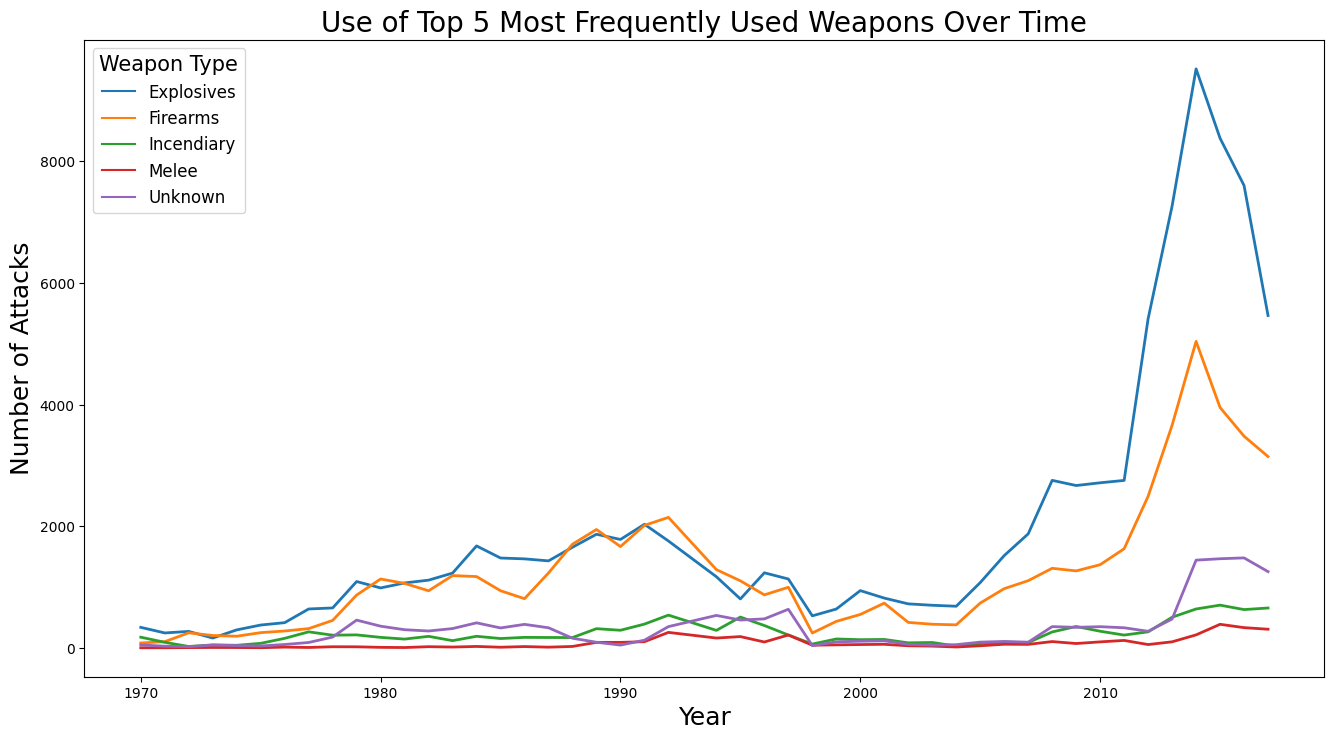

In [95]:
#Noticing trends in Terror attacks over the time
weapons_over_time = df[['iyear', 'weaptype1_txt']].groupby(['iyear', 'weaptype1_txt']).size().reset_index(name='count')
top5_weapons = weapons_over_time.groupby('weaptype1_txt')['count'].sum().nlargest(5).index
top5_weapons_over_time = weapons_over_time[weapons_over_time['weaptype1_txt'].isin(top5_weapons)]
plt.figure(figsize=(16, 8.27))
ax = sns.lineplot(x='iyear', y='count', hue='weaptype1_txt', data=top5_weapons_over_time, markersize=8, linewidth=2)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Number of Attacks', fontsize=18)
ax.set_title('Use of Top 5 Most Frequently Used Weapons Over Time', fontsize=20)
plt.legend(title='Weapon Type', title_fontsize='15', fontsize='12')
plt.show()


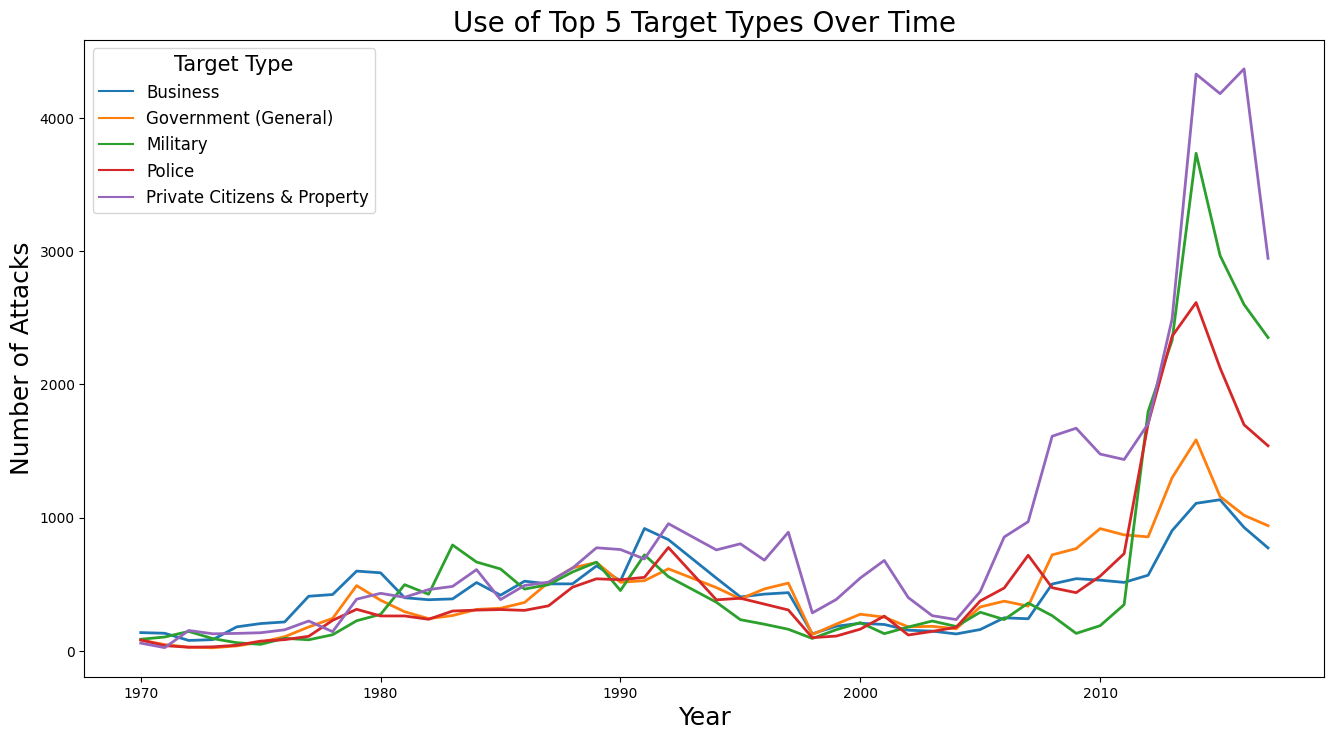

In [100]:
# Plot the use of the top 7 target types over time using a line graph
targets_over_time = df[['iyear', 'targtype1_txt']].groupby(['iyear', 'targtype1_txt']).size().reset_index(name='count')
top5_targets = targets_over_time.groupby('targtype1_txt')['count'].sum().nlargest(5).index
top5_targets_over_time = targets_over_time[targets_over_time['targtype1_txt'].isin(top5_targets)]
plt.figure(figsize=(16, 8.27))
ax = sns.lineplot(x='iyear', y='count', hue='targtype1_txt', data=top5_targets_over_time, linewidth=2)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Number of Attacks', fontsize=18)
ax.set_title('Use of Top 5 Target Types Over Time', fontsize=20)
plt.legend(title='Target Type', title_fontsize='15', fontsize='12')
plt.show()


<Figure size 1600x827 with 0 Axes>

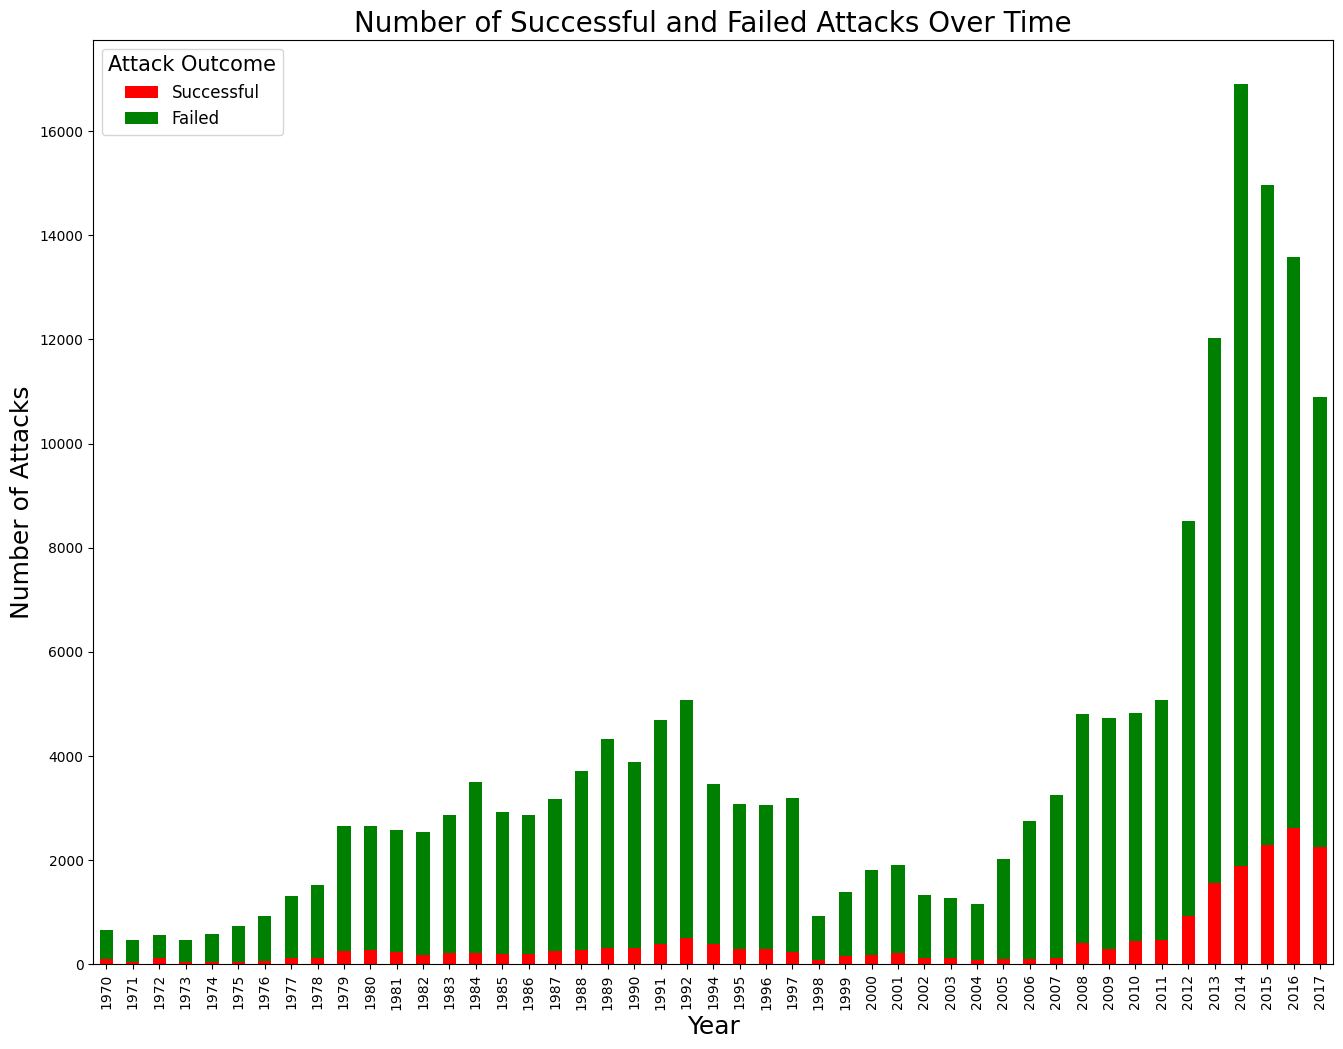

In [102]:
# Plot the number of successful and failed attacks over time using a bar chart
success_fail_over_time = df[['iyear', 'success']].groupby(['iyear', 'success']).size().reset_index(name='count')
success_fail_over_time_pivot = success_fail_over_time.pivot(index='iyear', columns='success', values='count').fillna(0)
plt.figure(figsize=(16, 8.27))
ax = success_fail_over_time_pivot.plot(kind='bar', stacked=True, color=['red', 'green'])
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Number of Attacks', fontsize=18)
ax.set_title('Number of Successful and Failed Attacks Over Time', fontsize=20)
plt.legend(title='Attack Outcome', title_fontsize='15', fontsize='12', labels=['Successful', 'Failed'])
plt.show()

## Results

### Check the results in **Result** document.